<a href="https://colab.research.google.com/github/victorbahlangene/Fastai-Docs/blob/main/Model_hooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00


In [2]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00


# Model hooks
Callback and helper function to add hooks in models

In [3]:
from fastai.test_utils import *

## What are hooks

In [4]:
import torch
import torch.nn as nn

Forward hooks are functions that take three arguments: **the layer it’s applied to, the input of that layer and the output of that layer**.

In [5]:
tst_model = nn.Linear(5,3)

def example_forward_hook(m,i,o): print(m,i,o)

x = torch.randn(4,5)
hook = tst_model.register_forward_hook(example_forward_hook)
y = tst_model(x)
hook.remove()

Linear(in_features=5, out_features=3, bias=True) (tensor([[ 1.5617, -0.5764, -0.5264, -1.3720,  0.1301],
        [-0.6267,  0.3025,  1.6808, -0.4591,  1.1108],
        [ 0.5713,  0.1293, -0.5833, -0.9145,  0.9586],
        [-0.0492,  1.8205, -0.8575, -0.2541,  1.3887]]),) tensor([[-0.3358, -0.3057, -0.1852],
        [-1.4703,  0.0146, -0.3822],
        [-0.7983, -0.1682,  0.0772],
        [-1.3268, -0.2786,  0.0400]], grad_fn=<AddmmBackward0>)


In [6]:
tst_model = nn.Linear(5,3)

def example_forward_hook(m,i,o): print(m)

x = torch.randn(4,5)
hook = tst_model.register_forward_hook(example_forward_hook)
y = tst_model(x)
hook.remove()

Linear(in_features=5, out_features=3, bias=True)


In [7]:
tst_model = nn.Linear(5,3)

def example_forward_hook(m,i,o): print(i,i[0].shape)

x = torch.randn(4,5)
hook = tst_model.register_forward_hook(example_forward_hook)
y = tst_model(x)
hook.remove()

(tensor([[ 0.5001, -0.1506,  0.6587,  2.4516,  0.1100],
        [ 1.7144, -0.2217, -0.3853,  0.9574,  0.5612],
        [ 0.0459, -0.6030,  0.2451, -0.6627, -0.7850],
        [ 1.5852, -0.6003, -0.6308,  0.4925, -2.0966]]),) torch.Size([4, 5])


In [8]:
tst_model = nn.Linear(5,3)

def example_forward_hook(m,i,o): print(o)

x = torch.randn(4,5)
hook = tst_model.register_forward_hook(example_forward_hook)
y = tst_model(x)
hook.remove()

tensor([[-0.1372, -0.1876, -0.5676],
        [ 0.2365,  0.1902,  0.0266],
        [ 0.6004, -1.2084, -0.2020],
        [ 0.6295,  0.3250,  0.0293]], grad_fn=<AddmmBackward0>)


## Hook method

In [9]:
import fastbook
from fastbook import *

In [10]:
Hook

fastai.callback.hook.Hook

In [11]:
tst_model = nn.Linear(5,3)
hook = Hook(tst_model, lambda m,i,o: print(o))
y = tst_model(x)

tensor([[-0.3697,  0.1988, -0.6354],
        [-0.3355,  0.3299, -0.4776],
        [ 1.2334,  0.3525,  0.8790],
        [-0.2617, -0.2839, -0.1116]])


In [12]:
y

tensor([[-0.3697,  0.1988, -0.6354],
        [-0.3355,  0.3299, -0.4776],
        [ 1.2334,  0.3525,  0.8790],
        [-0.2617, -0.2839, -0.1116]], grad_fn=<AddmmBackward0>)

In [13]:
tst_model = nn.Linear(5,3)
def test2_hook(m,i,o): print(i,o)
hook = Hook(tst_model, test2_hook)
y = tst_model(x)

(tensor([[-0.8019,  0.0992, -0.5316, -0.5156, -0.8868],
        [-0.7594, -0.5620, -0.6866,  0.3091,  0.0309],
        [ 1.0499,  1.5015,  0.1425,  1.1421,  0.7552],
        [-0.0495, -0.1002, -0.8927, -0.3928,  0.7822]]),) tensor([[ 0.5508, -0.0050, -0.1263],
        [ 0.2886, -0.0779,  0.1085],
        [-0.2000, -0.7405, -0.4581],
        [ 0.1358, -0.1012,  0.3773]])


## Hooks

In [14]:
Hooks

fastai.callback.hook.Hooks

Create several hooks on the modules in ms with hook_func.

In [15]:
layers = [nn.Linear(5,10), nn.ReLU(), nn.Linear(10,3)]
tst_model = nn.Sequential(*layers)
hooks = Hooks(tst_model, lambda m,i,o: print(o[0].shape))
y = tst_model(x)
hooks.remove()

torch.Size([10])
torch.Size([10])
torch.Size([3])


In [16]:
hooks

In [17]:
hooks.stored

(#3) [None,None,None]

In [18]:
layers[0](x)

tensor([[ 0.1760, -0.4037, -0.0124, -0.1849, -0.0668,  0.2383, -0.1346,  0.9624, -0.1370,  0.0795],
        [-0.0736, -0.5614, -0.7206,  0.2539, -0.3461,  0.1855,  0.2470,  0.0545, -0.1999,  0.0642],
        [ 0.8082,  0.0123, -0.4478, -0.2208, -0.0604, -0.1632,  0.2191,  0.2832, -0.0954,  0.0015],
        [ 0.3219, -0.9713, -0.6884, -0.0540, -0.0773, -0.1020,  0.9323,  0.4836, -0.7972, -0.2757]], grad_fn=<AddmmBackward0>)

In [19]:
layers = [nn.Linear(5,10), nn.ReLU(), nn.Linear(10,3)]
tst_model = nn.Sequential(*layers)
hooks = Hooks(tst_model, lambda m,i,o: o)
y = tst_model(x)
test_eq(hooks.stored[0], layers[0](x))
test_eq(hooks.stored[1], F.relu(layers[0](x)))
test_eq(hooks.stored[2], y)
hooks.remove()

In [20]:
layers = [nn.Linear(5,10), nn.ReLU(), nn.Linear(10,3)]
tst_model = nn.Sequential(*layers)
hooks = Hooks(tst_model, lambda m,i,o: print(o))
y = tst_model(x)
print("\n")
print(hooks.stored[0])

hooks.remove()

tensor([[ 0.2135,  0.2991,  0.1091,  0.4519,  0.1440,  0.1865,  0.3592, -0.1415, -0.6292,  0.2060],
        [ 0.8909,  0.5872, -0.0776,  0.7051, -0.2049, -0.1815,  0.3989, -0.3862, -0.2130,  0.1014],
        [ 0.4639, -0.1883,  1.3728, -1.0542, -1.4402, -0.3156, -0.4781, -0.2997,  0.3744, -0.5697],
        [ 0.8413,  1.1554,  0.1176,  0.0795, -0.3694, -0.3402,  0.7578, -1.0272, -0.4587, -0.3558]])
tensor([[0.2135, 0.2991, 0.1091, 0.4519, 0.1440, 0.1865, 0.3592, 0.0000, 0.0000, 0.2060],
        [0.8909, 0.5872, 0.0000, 0.7051, 0.0000, 0.0000, 0.3989, 0.0000, 0.0000, 0.1014],
        [0.4639, 0.0000, 1.3728, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3744, 0.0000],
        [0.8413, 1.1554, 0.1176, 0.0795, 0.0000, 0.0000, 0.7578, 0.0000, 0.0000, 0.0000]])
tensor([[-0.3122, -0.1787,  0.3114],
        [-0.3682, -0.4808,  0.2722],
        [-0.4778,  0.1582,  0.0068],
        [-0.2994, -0.5501, -0.0587]])


None


In [21]:
layers = [nn.Linear(5,10), nn.ReLU(), nn.Linear(10,3)]
tst_model = nn.Sequential(*layers)
hooks = Hooks(tst_model, lambda m,i,o: o)
y = tst_model(x)
print("\n")
print(hooks.stored[0])

hooks.remove()



tensor([[-0.2470,  0.2852,  0.4287, -0.4837,  0.3051,  1.0752,  0.6664, -0.2508, -0.2832, -0.1925],
        [-0.4799,  0.2110,  0.2978, -0.5594,  0.0787,  0.5181,  0.2560, -0.6618, -0.2803,  0.2296],
        [ 0.7274, -0.2810, -1.7151, -0.2786, -0.6667, -0.5526,  0.3633,  0.2349,  0.4055, -0.7726],
        [-0.2309, -0.4940,  0.1522,  0.1785, -0.1185,  0.4966,  0.6222, -1.0392,  0.3868,  0.2112]])


In [22]:
hooks.stored

(#3) [tensor([[-0.2470,  0.2852,  0.4287, -0.4837,  0.3051,  1.0752,  0.6664, -0.2508, -0.2832, -0.1925],
        [-0.4799,  0.2110,  0.2978, -0.5594,  0.0787,  0.5181,  0.2560, -0.6618, -0.2803,  0.2296],
        [ 0.7274, -0.2810, -1.7151, -0.2786, -0.6667, -0.5526,  0.3633,  0.2349,  0.4055, -0.7726],
        [-0.2309, -0.4940,  0.1522,  0.1785, -0.1185,  0.4966,  0.6222, -1.0392,  0.3868,  0.2112]]),tensor([[0.0000, 0.2852, 0.4287, 0.0000, 0.3051, 1.0752, 0.6664, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2110, 0.2978, 0.0000, 0.0787, 0.5181, 0.2560, 0.0000, 0.0000, 0.2296],
        [0.7274, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3633, 0.2349, 0.4055, 0.0000],
        [0.0000, 0.0000, 0.1522, 0.1785, 0.0000, 0.4966, 0.6222, 0.0000, 0.3868, 0.2112]]),tensor([[-0.2061, -0.6044, -0.2071],
        [-0.1924, -0.4396, -0.2157],
        [-0.3420, -0.0218, -0.1911],
        [-0.1427, -0.3155, -0.0512]])]

## HookCallback

```python
 HookCallback (modules=None, every=None, remove_end=True, is_forward=True,
               detach=True, cpu=True, include_paramless=False, hook=None)
```

In [23]:
synth_learner

<function fastai.test_utils.synth_learner(n_trn=10, n_val=2, cuda=False, lr=0.001, data=None, model=None, *, loss_func: 'callable | None' = None, opt_func: 'Optimizer | OptimWrapper' = <function Adam at 0x790ba682e8c0>, splitter: 'callable' = <function trainable_params at 0x790ba9a383a0>, cbs: 'Callback | MutableSequence | None' = None, metrics: 'callable | MutableSequence | None' = None, path: 'str | Path | None' = None, model_dir: 'str | Path' = 'models', wd: 'float | int | None' = None, wd_bn_bias: 'bool' = False, train_bn: 'bool' = True, moms: 'tuple' = (0.95, 0.85, 0.95), default_cbs: 'bool' = True)>

In [24]:
class TstCallback(HookCallback):
  def hook(self, m,i,o): return o
  def after_batch(self): test_eq(self.hooks.stored[0], self.pred)

learn = synth_learner(n_trn=5, cbs = TstCallback())
learn.fit(1)

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,time
0,32.211258,24.315292,00:00


In [25]:
class TstCallback(HookCallback):
    def __init__(self, modules=None, remove_end=True, detach=True, cpu=False):
        super().__init__(modules, None, remove_end, False, detach, cpu)
    def hook(self, m, i, o): return o
    def after_batch(self):
        if self.training:
            test_eq(self.hooks.stored[0][0], 2*(self.pred-self.y)/self.pred.shape[0])

learn = synth_learner(n_trn=5, cbs = TstCallback())
learn.fit(1)

epoch,train_loss,valid_loss,time
0,10.517303,8.470366,00:00


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [26]:
doc(synth_learner)

In [27]:
# class TstCallback(HookCallback):
#     def __init__(self, modules=None, remove_end=True, detach=True, cpu=False):
#         super().__init__(modules, None, remove_end, False, detach, cpu)
#     def hook(self, m, i, o): return o
#     def after_batch(self):
#         if self.training:
#             test_eq(self.hooks.stored[0][0], 2*(self.pred-self.y)/self.pred.shape[0])

# layers = [nn.Linear(5,10), nn.ReLU(), nn.Linear(10,3)]
# tst_model = nn.Sequential(*layers)

# learn = synth_learner(n_trn=5, model=tst_model, cbs = TstCallback())
# learn.fit(1)

### using a dataset

In [28]:
doc(ActivationStats)

In [29]:
path = untar_data(URLs.MNIST)

In [30]:
Path.BASE_PATH = path

In [31]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [32]:
def get_dls(bs=64):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

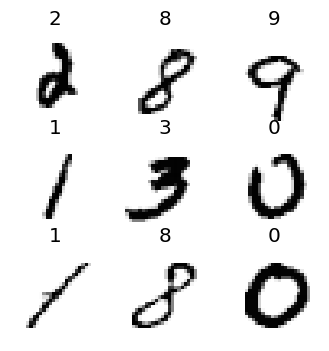

In [33]:
dls.show_batch(max_n=9, figsize=(4,4))

In [34]:
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

In [35]:
def simple_cnn():
    return sequential(
        conv(1 ,8, ks=5),        #14x14
        conv(8 ,16),             #7x7
        conv(16,32),             #4x4
        conv(32,64),             #2x2
        conv(64,10, act=False),  #1x1
        Flatten(),
    )

In [36]:
xb,yb = dls.one_batch()
xb.shape

torch.Size([64, 1, 28, 28])

In [40]:
simple_cnn()(xb.to("cpu")).shape

torch.Size([64, 10])

In [42]:
type(xb), xb.type()

(fastai.torch_core.TensorImageBW, 'torch.cuda.FloatTensor')

In [43]:
def fit(epochs=1):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit(epochs, 0.06)
    return learn

In [44]:
learn = fit()

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,2.306692,2.310989,0.102800,01:23


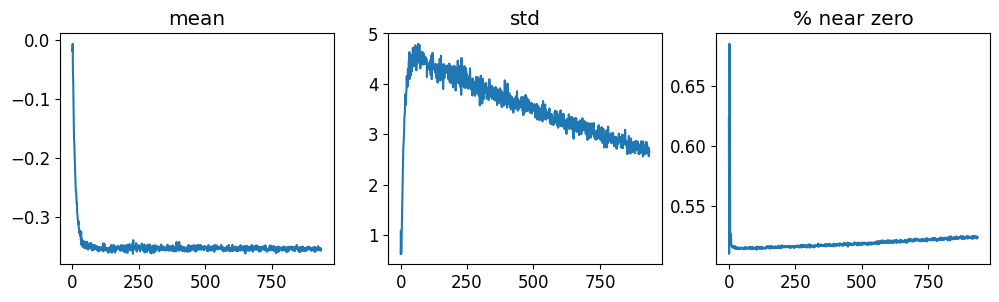

In [45]:
learn.activation_stats.plot_layer_stats(0)

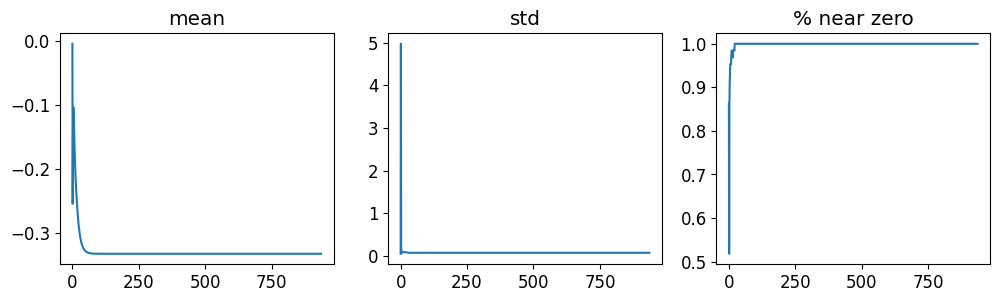

In [48]:
learn.activation_stats.plot_layer_stats(-2)

In [52]:
# learn.activation_stats.layer_stats(1)

#### Increase Batch Size

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.440120,0.270938,0.913400,01:05


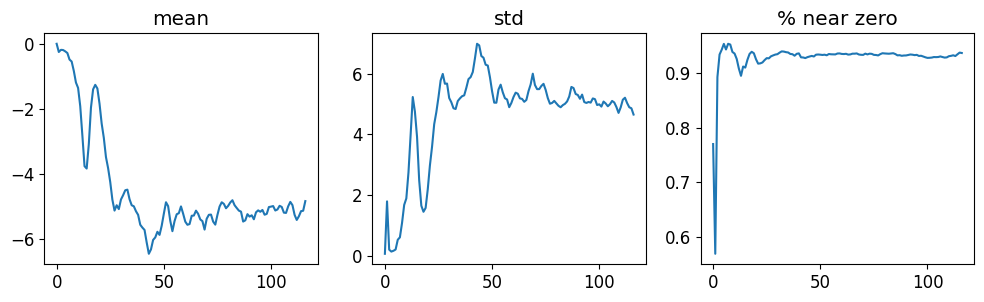

In [53]:
dls = get_dls(512)
learn = fit()
learn.activation_stats.plot_layer_stats(-2)

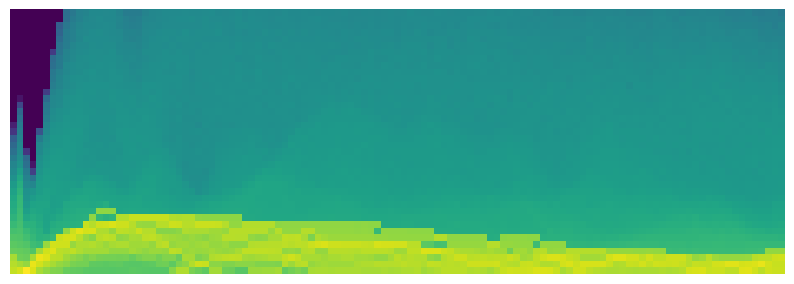

In [55]:
learn.activation_stats.color_dim(0)

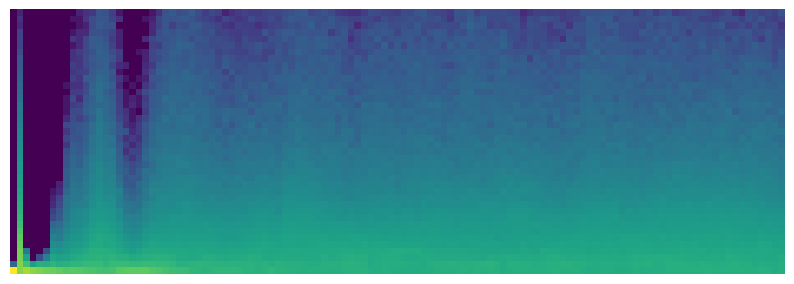

In [54]:
learn.activation_stats.color_dim(-2)

#### 1cycle Training

In [59]:
def fit(epochs=1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr)
    return learn

In [57]:
doc(ActivationStats)

In [60]:
learn = fit()

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.206523,0.074259,0.977200,01:06


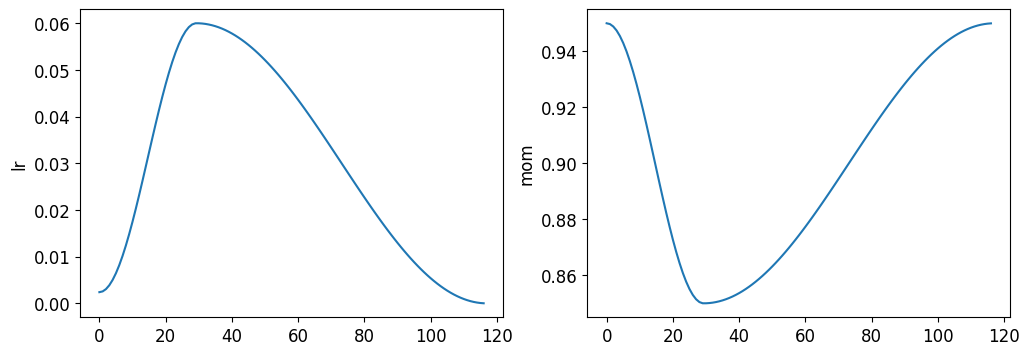

In [61]:
learn.recorder.plot_sched()

**first layer**

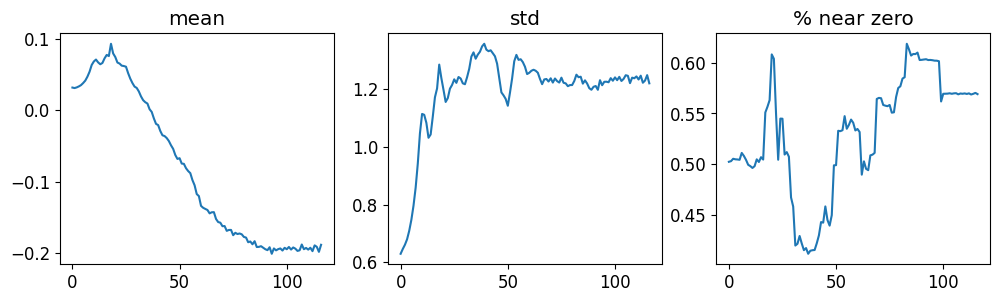

In [62]:
learn.activation_stats.plot_layer_stats(0)

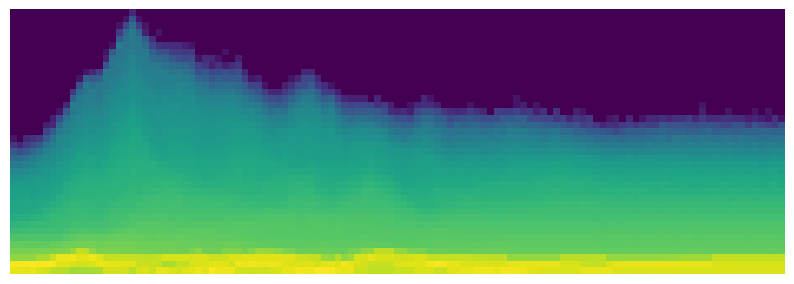

In [63]:
learn.activation_stats.color_dim(0)

**Second of last layer**

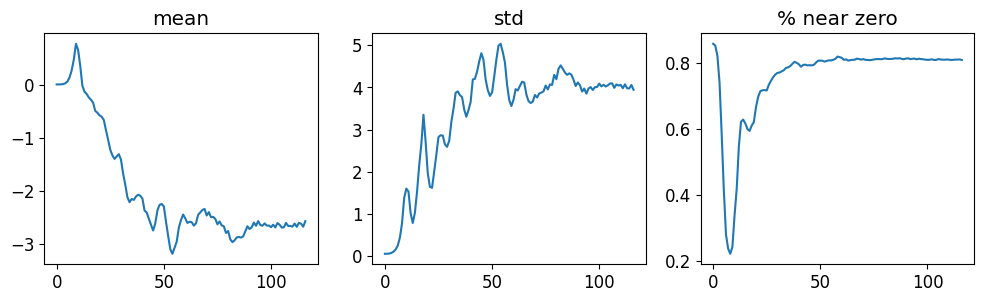

In [65]:
learn.activation_stats.plot_layer_stats(-2)

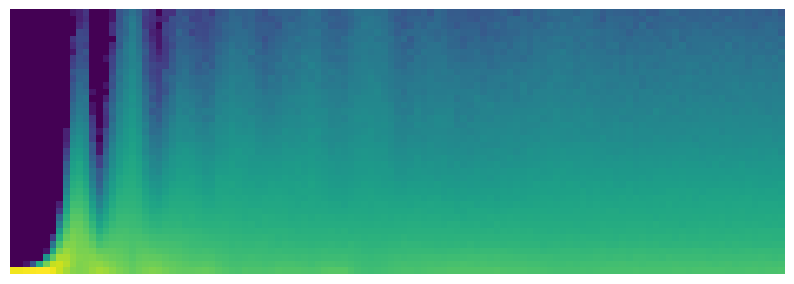

In [66]:
learn.activation_stats.color_dim(-2)

#### Batch Normalization

In [69]:
# nn.BatchNorm2d??

In [70]:
def conv(ni, nf, ks=3, act=True):
  layers = [nn.Conv2d(ni,nf,stride=2,kernel_size=ks,padding=ks//2)]
  if act: layers.append(nn.ReLU())
  layers.append(nn.BatchNorm2d(nf))
  return nn.Sequential(*layers)

In [71]:
learn = fit()

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.135647,0.060530,0.984400,01:16


first layer

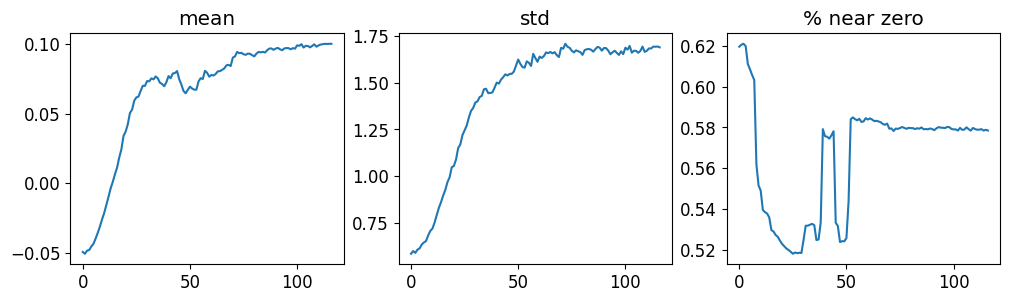

In [72]:
learn.activation_stats.plot_layer_stats(0)

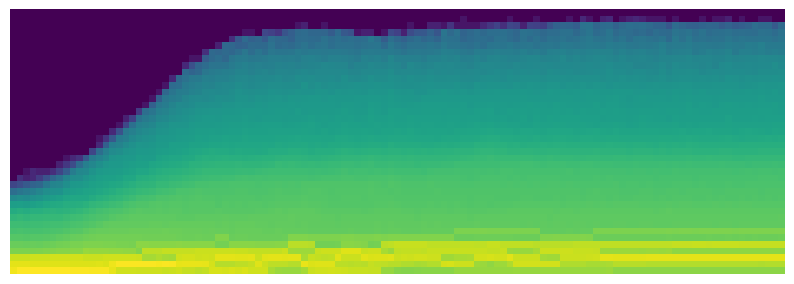

In [73]:
learn.activation_stats.color_dim(0)

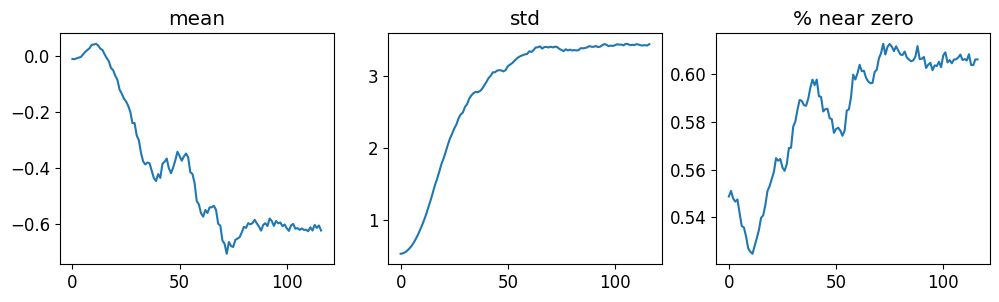

In [74]:
learn.activation_stats.plot_layer_stats(-4)

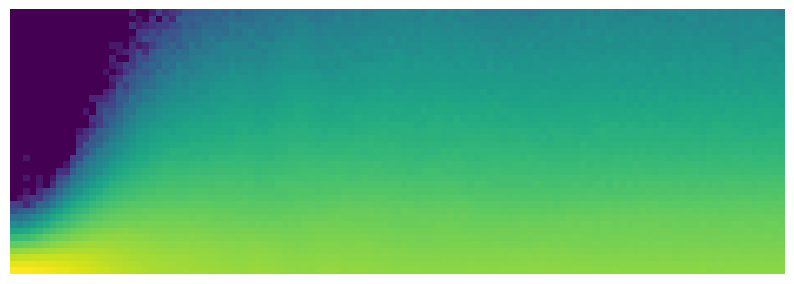

In [75]:
learn.activation_stats.color_dim(-4)

In [76]:
learn = fit(5, lr=0.1)

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.177595,0.087353,0.973900,01:11
1,0.077045,0.063242,0.979200,01:06
2,0.050842,0.038433,0.987800,01:07
3,0.031048,0.027984,0.990900,01:05
4,0.016322,0.024167,0.991200,01:10


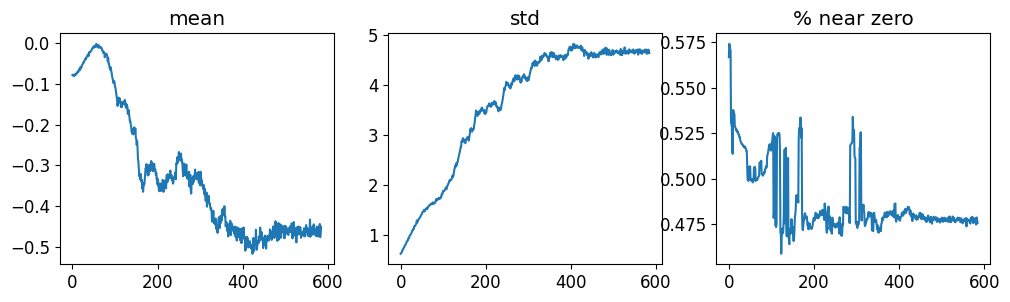

In [77]:
learn.activation_stats.plot_layer_stats(0)

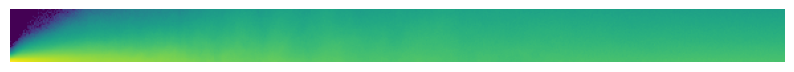

In [79]:
learn.activation_stats.color_dim(-4)